# CS 449 Final Project Proposal

Due: April 21, 2023 at 11:59pm

## 1. Names and Net IDs

Larina Chen (lcx2942), Winston Ding (wmd5298), Christian Benjamin Duffee  (cbd2602), Jack Wheeler (jnw9832)

## 2. Abstract

Our project seeks to implement two Generative Adversarial Networks (GAN) to generate a dataset of synthetic chest X-ray images containing 2 types of images: 1) normal chest X-rays, and 2) bacterial pneumonia-detected chest X-rays. Each GAN will generate one type of data. Ideally, the generated images will be indistinguishable from real X-rays while not being direct copies from the dataset. 

dataset: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia 

## 3. Introduction

We hope to overcome the limited availability of real-world pneumonia chest X-ray scans by using GANs to generate synthetic datasets, which may be used for training future models for pneumonia diagnosis. We will use a large dataset of xxx gray-scale chest X-ray images containing X-ray samples without pneumonia and with bacterial pneumonia. We will split the dataset into 2 sub-datasets: one containing 1300 images solely without pneumonia, and one containing 2500 images solely with bacterial pneumonia. We will be training 2 GANs:

<br>
<img src = "./proposal_figures/Table1.png" />
<br>

## 4a. Describe your dataset(s)

*List the datasets you plan to use, where you found them, and what they contain. Be detailed! For each dataset, what does the data look like? What is the data representation? (e.g., what resolution of images? what length of sequences?) How is the data annotated or labeled? Include citations for the datasets. Include at least one citation of previous work that has used your data, or explain why no one has used your data before.*

This dataset contains 5,863 monochromatic jpg images of variable sizes. Each image is a chest x-ray of a child, between one and five years old, who received routine care from the Guangzhou Women and Children’s Medical Center. Each x-ray image has the letter “R” in white superimposed onto it, typically off to the side of the image. The dataset is split between normal, bacterial pneumonia, and viral pneumonia images. Counts of each class were not provided, although there are about an equal number of normal and viral pneumonia x-rays and about twice as many bacterial pneumonia x-rays. This dataset was used by Kermany et al. who achieved an accuracy of 92.8%, a sensitivity of 93.2%, and specificity of 90.1% in classifying pneumonia vs normal data. Separately, they were also able to have an accuracy of 90.7%, a sensitivity of 88.6%, and specificity of 90.9% in classifying bacterial pneumonia vs viral pneumonia...

## 4b. Load your dataset(s)

*Demonstrate that you have made at least some progress with getting your
dataset ready to use. Load at least a few examples and visualize them
as best you can*

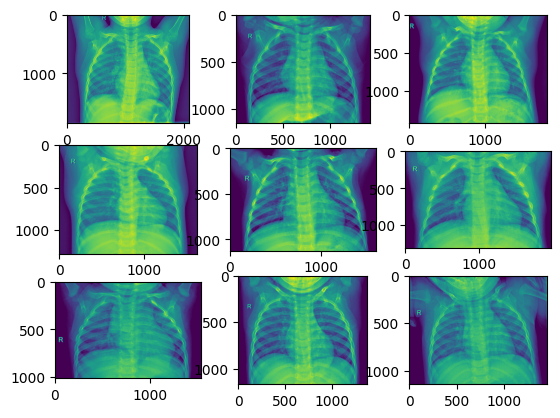

[[ 22  24  24 ...  96  94  93]
 [ 23  24  24 ...  97  94  92]
 [ 24  24  23 ...  99  96  94]
 ...
 [ 49  50  48 ... 119 119 119]
 [ 50  52  53 ... 123 124 123]
 [ 52  53  54 ... 129 128 127]]


In [3]:
from PIL import Image
from matplotlib import image, pyplot
import numpy as np
import os 
import sys

image1 = image.imread(os.path.join(sys.path[0], "NORMAL_TRAIN/IM-0115-0001.jpeg"))
image2 = image.imread(os.path.join(sys.path[0], "NORMAL_TRAIN/IM-0117-0001.jpeg"))
image3 = image.imread(os.path.join(sys.path[0], "NORMAL_TRAIN/IM-0119-0001.jpeg"))
image4 = image.imread(os.path.join(sys.path[0], "NORMAL_TRAIN/IM-0122-0001.jpeg"))
image5 = image.imread(os.path.join(sys.path[0], "NORMAL_TRAIN/IM-0125-0001.jpeg"))
image6 = image.imread(os.path.join(sys.path[0], "NORMAL_TRAIN/IM-0127-0001.jpeg"))
image7 = image.imread(os.path.join(sys.path[0], "NORMAL_TRAIN/IM-0128-0001.jpeg"))
image8 = image.imread(os.path.join(sys.path[0], "NORMAL_TRAIN/IM-0129-0001.jpeg"))
image9 = image.imread(os.path.join(sys.path[0], "NORMAL_TRAIN/IM-0131-0001.jpeg"))


fig, axes = pyplot.subplots(3,3)

axes[0][0].imshow(image1)
axes[0][1].imshow(image2)
axes[0][2].imshow(image3)
axes[1][0].imshow(image4)
axes[1][1].imshow(image5)
axes[1][2].imshow(image6)
axes[2][0].imshow(image7)
axes[2][1].imshow(image8)
axes[2][2].imshow(image9)

#pyplot.imshow(image)
pyplot.show()

image_data = Image.open(os.path.join(sys.path[0], "NORMAL_TRAIN/IM-0115-0001.jpeg"))
image_data = np.asarray(image_data)
print(image_data)

## 4c. Small dataset

*Many deep learning datasets are very large, which is helpful for training powerful models but makes debugging difficult. For your update, you will need to construct a small version of your dataset that contains 200-1000 examples and is less than 10MB. If you are working with images, video, or audio, you may need to downsample your data. If you are working with text, you may need to truncate or otherwise preprocess your data.*

*Give a specific plan for how you will create a small version of one dataset you'll use that is less than 10MB in size. Mention the current size of your dataset and how many examples it has and how those numbers inform your plan.*

From our initial dataset, we will be creating a smaller dataset consisting of 100 images depicting x-rays of patients with pneumonia caused by a bacteria infection and 100 images of patients without pneumonia. Out of the initial ~2600 images that were originally provided, we will first sort the images by image size to get an idea of which image dimensions appear the most in the dataset. We will then choose a random sample of 100 images from each category of similar size to use for the dataset that are each around 50kb in size. 

## 5. Methods

*Describe what methods you plan to use. This is a deep learning class, so you should use deep learning methods. Cite at least one or two relevant papers. What model architectures or pretrained models will you use? What loss function(s) will you use and why? How will you evaluate or visualize your model's performance?*

We are using a Generative Adversarial Network (GAN), which is composed of a discriminator model and a generator model. The generator model minimizes its loss function defined by producing images that the discriminator model will classify as real data. The discriminator acts as a convolutional neural network in our case, as we are working with medical imaging data. (Source: Synthetic Medical Images from Dual Generative Adversarial Networks).

<img src = "proposal_figures/EQ1.png" /><br>
Equation 1

<br>
<img src = "proposal_figures/EQ2.png" />
<br>
Equation 2

The cross-entropy loss function was the loss function of choice to train the discriminator for the first stage of the Generative Neural Network in the “Synthetic Medical Images from Dual Generative Adversarial Networks”, where D is the discriminator model, and G is the generative model. This loss function is likely used since the paper deals with a classification problem between retinal medical image data, and since our goal is to classify between synthetically generated data and real data, the cross-entropy loss function is a viable choice.

<br>
<img src = "proposal_figures/EQ3.png" />
<br>
Equation 3

This defined loss function for the generator from the same paper is an application of taking the overall loss of the model to be the average of the how well the discriminator model is able to discern the generative model's new image data.

In the “Generative Adversarial Nets” paper, it added that Equation 3 may not be optimal to use as the loss function early in the learning process, as the discriminator function will easily reject samples from the generator much more often. Instead, the generator function may have a new loss function in the beginning to maximize log D(G(z)). 

<br>
<img src = "proposal_figures/Figure1.png" />
<br>
Figure 1

The model depicted in the “Generative Adversarial Nets” paper follows the process in Figure 1 in order to train the model.

To evaluate the effectiveness of the model, we can use a mix of qualitative and quantitative measurements in order to judge how well the model generates realistic synthetic images.

In the paper  “Evaluation of Generative Adversarial Network Performance Based on Direct Analysis of Generated Images”, the 3 main factors to consider are
The generator shouldn’t reproduce the same images that were already provided (creativity).
The generator should produce images that contain key features from the images the model was based from (inheritance).
The generator should produce a variety of images (diversity).

Possible measures to quantify these goals based from the paper are:

The Inception score: Focuses on measuring the inheritance and diversity measures. “InceptionNet(x) is the label obtained from the pre-trained Inception network by inputting image x. For all generated images, we have the label set Y. The IS index is defined:”

<br>
<img src = "proposal_figures/Equation4.png" />
<br>
Equation 4

Fréchet Inception Distance: “Instead of output labels it uses feature vectors from the final pooling layers of InceptionNet. All real and generated images are input to the network to extract their feature vectors.”

<br>
<img src = "proposal_figures/Equation5.png" />
<br>
Equation 5

1 Nearest Neighbor Classifier: A familiar and previously implemented machine learning model, where it uses a two sample test with real and generated image sets. The goal is to detect whether the model is overfitting a data set where the distribution of the synthetically generated sets are too similar to the real data, or whether the distribution is too dissimilar by an accuracy measure called the leave-one-out (LOO). However, this measure requires the size of the two datasets to be equal in size.

## 6. Deliverables

*Include at least six goals that you would like to focus on over the course of the quarter. These should be nontrivial, but you should have at least one and hopefully both of your "Essential" goals done by the project update, due in mid-May. Your "Stretch" goals should be ambitious enough such that completing one is doable, but completing both this quarter is unlikely.*

### 6.1 Essential Goals
1. Implement a generative adversarial network model, which consists of a generator neural network and a discriminator neural network. The generative model will provide new examples based on its training set while the discriminator model will discern between original data and synthetic data produced by the generative model.
    * 1 generator and 1 discriminator to generate X-ray images without pneumonia
    * 1 generator and 1 discriminator to generate X-ray images with bacterial pneumonia 

2. Qualitatively and quantitatively assess the images produced by the generative model by comparing the images across epochs and use the assessment method outlined above to determine how successful the GAN is. 
    * one quantitative method we are considering is using KNN to see how the generated data clusters around the real data. 


### 6.2 Desired Goals

1. Add noise to the data that the GAN is trained on to determine if noise has a positive, negative or negligible impact on the quality of the generated images.

2. Determine how certain GAN hyperparameters affect the training speed and final quality of the generated images. A select of best hyperparameters shall be chosen which generate the highest quality at a certain reasonable training time. 




### 6.3 Stretch Goals
1. Train classifiers on both the real and an expanded synthetic dataset. Compare the accuracies of these classifiers. The accuracy of the synthetic dataset trained classifier being improved compared to the real dataset trained classifier would indicate that using GANs is a useful method of improving the performance of classifiers in similar datasets. However, if it is decreased, then we know the GANs are not correctly learning certain aspects of the data that are important for classification. 

2. Determine how changing the hyperparameters of the GAN affect the synthetic dataset trained classifier’s accuracy.





## 7. Hopes and Concerns

*What are you most excited about with this project? What parts, if any, are you nervous about? For example:*

Our hope is to learn about GANs and how they are best used. We hope that we can visualize the progress of how the generator model creates synthetic images as the model is trained. In this case, we look forward to optimizing the hyperparameters to the model and observe how the behavior of the GAN changes. 

We are concerned as to whether the dataset is large enough in order to effectively train the GAN, and how the differing image sizes will affect the ability for GAN to effectively train the model. Moreover, we noticed that X-ray images have artifacts on them (e.g. a “R” labeling) other than just the biomedical information, so we are concerned about how the GAN would work with the artifacts. Additionally, we are concerned about Github’s repository size limit. 


## 8. References

*Cite the papers or sources that you used to discover your datasets and/or models, if you didn't include the citation above.*

Goodfellow, Ian J. “Generative Adversarial Networks.” 
https://doi.org/10.48550/arXiv.1406.2661

Guibas, John T. “Synthetic Medical Images from Dual Generative Adversarial Networks.”
https://doi.org/10.48550/arXiv.1709.01872

S. Guan and M. Loew, "Evaluation of Generative Adversarial Network Performance Based on Direct Analysis of Generated Images," 2019 IEEE Applied Imagery Pattern Recognition Workshop (AIPR), Washington, DC, USA, 2019, pp. 1-5, doi: 10.1109/AIPR47015.2019.9174595.

Kermany, Daniel S., et al. "Identifying medical diagnoses and treatable diseases by image-based deep learning." cell 172.5 (2018): 1122-1131.
https://www.cell.com/cell/fulltext/S0092-8674(18)30154-5
